In [1]:
import numpy as np
#load the dataset that we just saved in the preprocessing code
#loading the dataset into DATA & TARGET
data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()
#Here in this Neural Network architecture this CNN uses first layer with 200 3x3 kernals
#Followed by RELU 
#and next is the MaxPooling layer of size 2x2
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#This is Second layer with 100 3x3 kernals
#Followed by RELU 
#and next is the MaxPooling layer of size 2x2
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
#Flatten layer,dropout layer to get rid of over fitting as it reduces over fitting

model.add(Flatten())
model.add(Dropout(0.5))
#Dense layer of 50 neurons
model.add(Dense(64,activation='relu'))
#Dense layer of 2 neurons
model.add(Dense(2,activation='softmax'))

#The Final layer with two outputs for two categories
#Using adam optimizer to print accuracy while training

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [3]:
#split into train and test


from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
#create a model checkpoint to save and monitor the validation loss and save the best model for each epoch
#if validation loss increase after a epoch it will not be saved,,
#otherwise the saving the best model per each epoch

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
#training using model.fit for 20 epochs,and 20% validation data
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
93/93 [==============================] - 148s 2s/step - loss: 0.6707 - accuracy: 0.6025 - val_loss: 0.5326 - val_accuracy: 0.7164
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
93/93 [==============================] - 142s 2s/step - loss: 0.4526 - accuracy: 0.7980 - val_loss: 0.5171 - val_accuracy: 0.7300
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
93/93 [==============================] - 141s 2s/step - loss: 0.3758 - accuracy: 0.8438 - val_loss: 0.3482 - val_accuracy: 0.8507
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
93/93 [==============================] - 145s 2s/step - loss: 0.2614 - accuracy: 0.8843 - val_loss: 0.2935 - val_accuracy: 0.8725
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
93/93 [==============================] - 142s 2s/step - loss: 0.1806 - accuracy: 0.9252 - val_loss: 0.3222 - val_accuracy: 0.8779
Epoch 6/20
93/93 [==============================] - 136s 1s/ste

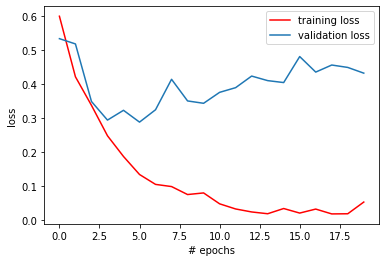

In [5]:
#here epoch with minimum validation loss is noted
from matplotlib import pyplot as plt
#Graphs for loss and epochs
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
#Training accuracy
print(model.evaluate(train_data,train_target))

116/116 [==============================] - 31s 272ms/step - loss: 0.0938 - accuracy: 0.9805
[0.09381284564733505, 0.9804613590240479]


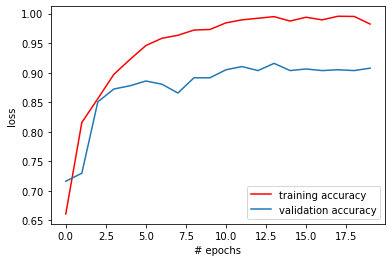

In [7]:
#accuracy for graphs
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
#Test accuracy
print(model.evaluate(test_data,test_target))

13/13 [==============================] - 3s 251ms/step - loss: 0.2950 - accuracy: 0.9317
[0.2949904799461365, 0.9317073225975037]
